### Лабораторная работа №3. Регрессионный анализ данных.

Выполнил: Гусев Павел 20-ИВТ-3

Вариант №2

Задание: 
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 


### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

* id - уникальный идентификатор для каждого проданного дома
* date - дата продажи дома
* price - цена каждого проданного дома
* bedrooms - Количество спален
* bathrooms - Количество ванных комнат, где 5 приходится на комнату с туалетом но без душа
* sqft_living - квадратные метры внутренней жилой площади квартир
* sqft_lot - квадратные метры земельного участка
* floors - количество этажей
* waterfront - фиктивная переменная для того, выходила ли квартира на набережную или нет
* view - индекс от 0 до 4 того, насколько хорошим был вид объекта недвижимости
* condition - индекс от 1 до 5 по состоянию квартиры,
* grade - это показатель от 1 до 13, где 1-3 не дотягивают до уровня строительства и проектирования зданий, 7 имеют средний уровень строительства и проектирования, а 11-13 имеют высокий уровень качества строительства и проектирования.
* sqft_above - квадратный метр внутреннего жилого пространства, находящегося над уровнем земли
* sqft_basement - квадратный метраж внутреннего жилого пространства, находящегося ниже уровня земли
* yr_built - год, когда дом был первоначально построен
* yr_renovated - год последнего ремонта дома
* zipcode - почтовый индекс дома
* lat - широта
* long - долгота
* sqft_living15 - метраж внутренней жилой площади жилого помещения для ближайших 15 соседей
* sqft_lot15 - квадратные метры земельных участков ближайших 15 соседей

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [88]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [89]:
house_df = pd.read_csv('kc_house_data.csv')
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [90]:
print('Размер набора данных до удаления дубликатов:', house_df.index.size)
house_df.drop_duplicates(inplace = True)
print('Размер набора данных после удаления дубликатов:', house_df.index.size)

Размер набора данных до удаления дубликатов: 21613
Размер набора данных после удаления дубликатов: 21613


### 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию).

In [91]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<AxesSubplot:>

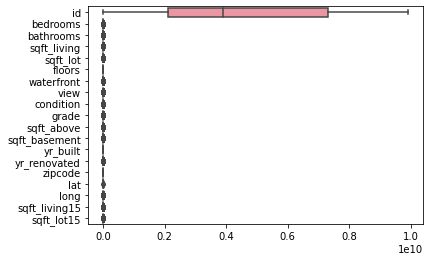

In [92]:
numerical_attributes = [column for column in house_df.columns if house_df[column].dtype.name != 'object' and house_df[column].name != 'price']
sns.boxplot(data = house_df[numerical_attributes], orient = 'h')

<AxesSubplot:>

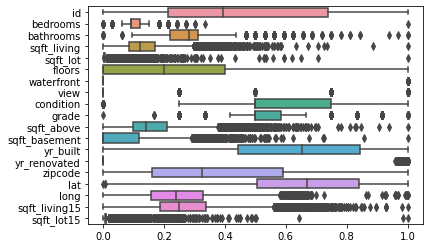

In [93]:
house_df[numerical_attributes] = preprocessing.MinMaxScaler().fit_transform(house_df[numerical_attributes].values.astype(float))
sns.boxplot(data = house_df[numerical_attributes], orient = 'h')

### 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены.

In [94]:
categorical_attributes = [column for column in house_df.columns if house_df[column].dtype.name == 'object']
print(categorical_attributes)
house_df = house_df.drop(categorical_attributes, axis=1)
house_df = house_df.drop(['zipcode','id'], axis=1)

['date']


### 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других.

<AxesSubplot:>

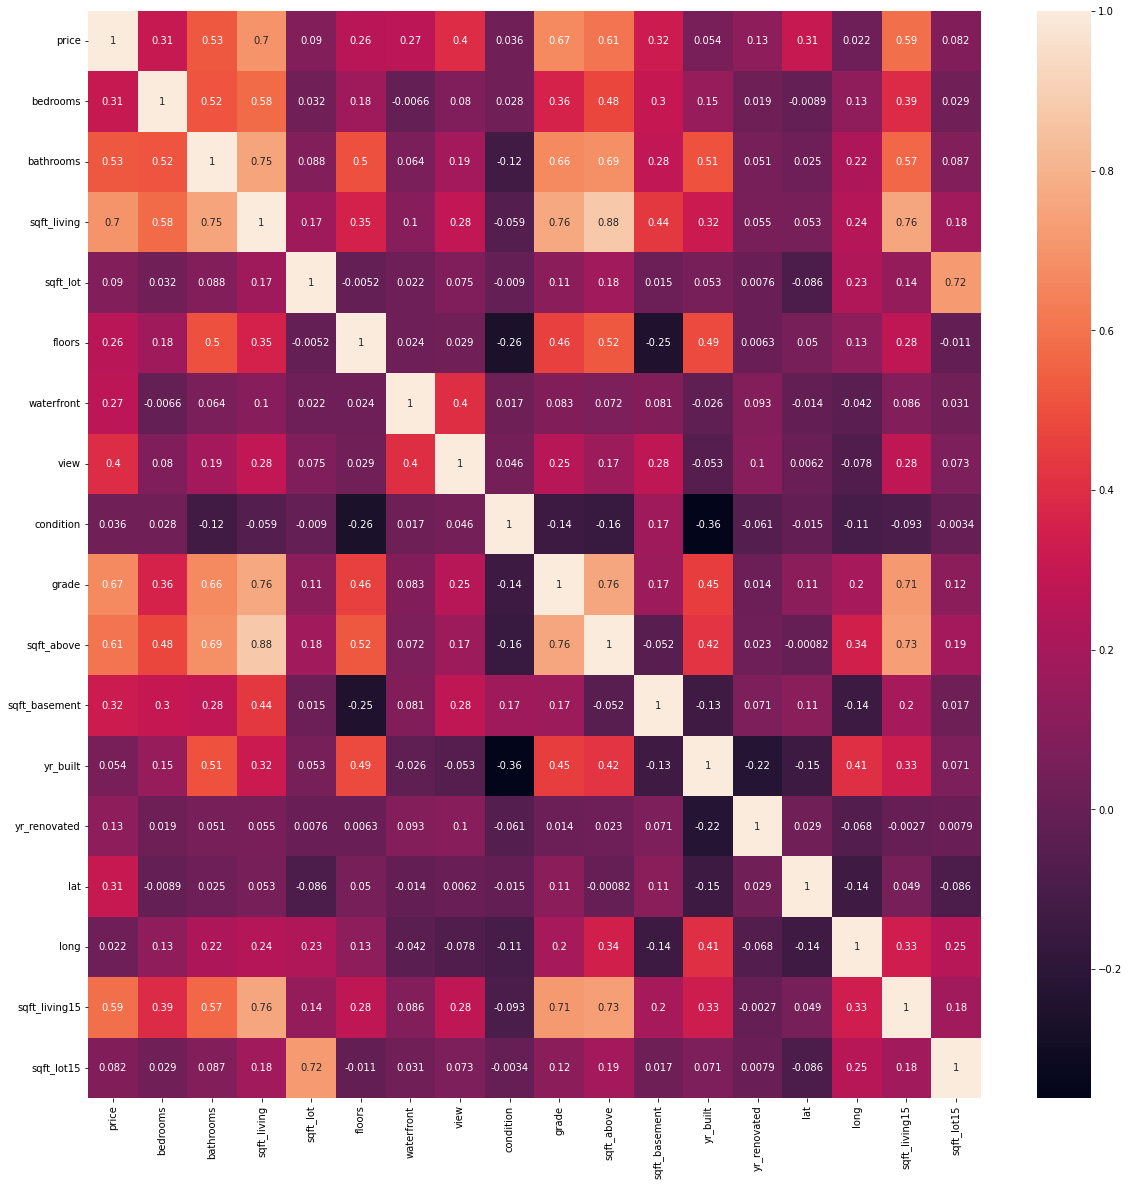

In [95]:
corr_matrix = house_df.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True)

### 6. Заполните пропущенные значения в данных.

In [96]:
house_df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [97]:
X = house_df.drop(['price'], axis=1)
Y = house_df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [98]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
reg_pred = reg.predict(X_test)
print(reg.coef_)
print(reg.intercept_)

Pearson, p_value_Pearson = pearsonr(reg_pred, Y_test)
Spearmen, p_value_Spearmen = spearmanr(reg_pred, Y_test)

print("Корреляция по Пирсону: ", Pearson)
print("Корреляция по Спирмену: ", Spearmen)

[-1.05925055e+06  3.27554848e+05  8.25244788e+05  2.81129157e+05
 -7.77705250e+02  6.07850604e+05  1.98055490e+05  1.20948412e+05
  1.20669200e+06  1.00055830e+06  3.75394554e+05 -2.83514040e+05
  4.22296264e+04  3.46169822e+05 -1.39721287e+05  1.72572358e+05
 -3.59285503e+05]
-555808.7370809279
Корреляция по Пирсону:  0.8420714336667292
Корреляция по Спирмену:  0.8540127401739198


In [99]:
warnings.filterwarnings('ignore')
reg = Ridge()
reg_grid = GridSearchCV(reg, {'alpha': np.arange(0, 3, 0.005)})
reg_grid.fit(X_train, Y_train)
best_alpha = reg_grid.best_estimator_.alpha

reg = Ridge(alpha=best_alpha)
reg.fit(X_train, Y_train)
reg_pred = reg.predict(X_test)

print(reg.coef_)
print(reg.intercept_)

Pearson, p_value_Pearson = pearsonr(reg_pred, Y_test)
Spearmen, p_value_Spearmen = spearmanr(reg_pred, Y_test)

print("Корреляция по Пирсону: ", Pearson)
print("Корреляция по Спирмену: ", Spearmen)
print('alpha:', best_alpha)

[-1.02866889e+06  3.26694382e+05  8.20579454e+05  2.63666311e+05
 -1.78149806e+02  6.06859014e+05  1.98785354e+05  1.20757806e+05
  1.20573117e+06  9.94984839e+05  3.73115361e+05 -2.83124645e+05
  4.24452420e+04  3.46344622e+05 -1.39814696e+05  1.74942055e+05
 -3.42106390e+05]
-557600.3122827446
Корреляция по Пирсону:  0.8420439334684772
Корреляция по Спирмену:  0.8541262296384612
alpha: 0.215
